Pregunta 2.
Carga los datos del archivo.
  
  a) Descarga el archivo en la plataforma kaggle.com
  
  b) Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.
  
  c) Crea un DataFrame en pandas para el archivo.

In [1]:
#Pregunta 2
#Carga los datos del archivo.
#a) Descarga el archivo en la plataforma kaggle.com
#b) Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.
#c) Crea un DataFrame en pandas para el archivo.
import pandas as pd
Train = pd.read_csv("Train.csv")
Train

Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_23371      F  42.0                4             Married   
1      EID_18000      M  24.0                3              Single   
2       EID_3891      F  58.0                3             Married   
3      EID_17492      F  26.0                3              Single   
4      EID_22534      F  31.0                1             Married   
...          ...    ...   ...              ...                 ...   
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown                       Unit Decision_skill_possess  \
0        Franklin                         IT             Conceptual   
1     Springfield                  Logistics             Analytical   
2         Clinton                    Quality             Conceptual   
3         Lebanon  Human Resource Management             Behavioral   
4     Springfield                  Logistics             Conceptual   
...           ...                        ...                    ...   
6995     Franklin                 Operarions             Behavioral   
6996      Lebanon                        R&D             Analytical   
6997  Springfield                         IT              Directive   
6998   Washington                      Sales             Behavioral   
6999     Franklin                         IT              Directive   

      Time_of_service  Time_since_promotion  ...  Compensation_and_Benefits  \
0                 4.0                     4  ...                      type2   
1                 5.0                     4  ...                      type2   
2                27.0                     3  ...                      type2   
3                 4.0                     3  ...                      type2   
4                 5.0                     4  ...                      type3   
...               ...                   ...  ...                        ...   
6995              4.0                     1  ...                      type3   
6996             16.0                     2  ...                      type3   
6997             10.0                     1  ...                      type2   
6998             24.0                     1  ...                      type0   
6999             22.0                     2  ...                      type2   

      Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                   3.0     4  0.7516  1.8688   2.0     4     5     3   
1                   4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                   1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                   1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                   3.0     1  0.7516 -0.4537   2.0     2     8     2   
...                 ...   ...     ...     ...   ...   ...   ...   ...   
6995                3.0     1  0.7516 -0.4537   2.0     3     7     3   
6996                3.0     2 -0.1048 -2.7762   2.0     4     8     4   
6997                4.0     2 -0.1048 -0.4537   2.0     4     8     3   
6998                2.0     4  0.7516  1.8688   2.0     3     6     3   
6999                3.0     3 -0.1048 -1.6150   3.0     4     5     3   

      Attrition_rate  
0             0.1841  
1             0.0670  
2             0.0851  
3             0.0668  
4             0.1827  
...              ...  
6995          0.7839  
6996          0.1055  
6997          0.7847  
6998          0.4162  
6999          0.0910  

[7000 rows x 24 columns]

In [2]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [3]:
print(Train['Gender'].unique())

['F' 'M']


In [4]:
print(Train['Relationship_Status'].unique())

['Married' 'Single']


In [5]:
print(Train['Hometown'].unique())

['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']


In [6]:
print(Train['Unit'].unique())

['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']


In [7]:
print(Train['Decision_skill_possess'].unique())

['Conceptual' 'Analytical' 'Behavioral' 'Directive']


In [8]:
print(Train['Compensation_and_Benefits'].unique())

['type2' 'type3' 'type0' 'type4' 'type1']


In [9]:
#Funcion que transforma una columna de un DataFrame df en una columna OneHotEncoded
from sklearn.preprocessing import OneHotEncoder

def insertOHEColumnIntoDF(df, col):
  encoder = OneHotEncoder(sparse_output=False)
  encoded_array = encoder.fit_transform(df[[col]])
  encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out([col]))
  col_index = df.columns.get_loc(col)
  # Instead of slicing by index, use column names
  columns_before = df.loc[:, df.columns[:col_index]]  # Get columns before using their names
  columns_after = df.loc[:, df.columns[col_index+1:]]  # Get columns after using their names
  df = pd.concat([columns_before, encoded_df, columns_after], axis=1)
  return df

In [10]:
#Funcion que ejecuta el metodo de Estandarizacion de acuerdo a la variable global standarizing_method
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#X2 = np.array(X) #Sin Normalizar
#X2 = StandardScaler().fit_transform(X) #Código estadarizado
#X2 = normalize(np.array(X)) #Código Normalizado
def standarizingMethod(df):
  if standarizing_method == 'normalize':
    array_df = normalize(np.array(df)) #Código Normalizado
  elif standarizing_method == 'standard':
    array_df = StandardScaler().fit_transform(df) #Código estadarizado
  elif standarizing_method == 'none':
    array_df = np.array(df) #Sin Normalizar
  return array_df

Pregunta 3. Transforma los datos según las características de las variables:

  a) Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.

  b) La selección de las variables y de estos métodos depende del modelo de su solución y será evaluada su pertenencia según los datos.

In [11]:
#Pregunta 3. Transforma los datos según las características de las variables:
# a) Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.
# b) La selección de las variables y de estos métodos depende del modelo de su solución y será evaluada su pertenencia según los datos.
# La decision propia es usar OHE
TrainTmp = Train
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Gender')
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Relationship_Status')
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Hometown')
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Unit')
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Decision_skill_possess')
TrainTmp = insertOHEColumnIntoDF(TrainTmp, 'Compensation_and_Benefits')

#Eliminación de NaN
TrainTmp = TrainTmp.fillna(TrainTmp.mean(numeric_only=True))

In [12]:
TrainTmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Employee_ID                        7000 non-null   object 
 1   Gender_F                           7000 non-null   float64
 2   Gender_M                           7000 non-null   float64
 3   Age                                7000 non-null   float64
 4   Education_Level                    7000 non-null   int64  
 5   Relationship_Status_Married        7000 non-null   float64
 6   Relationship_Status_Single         7000 non-null   float64
 7   Hometown_Clinton                   7000 non-null   float64
 8   Hometown_Franklin                  7000 non-null   float64
 9   Hometown_Lebanon                   7000 non-null   float64
 10  Hometown_Springfield               7000 non-null   float64
 11  Hometown_Washington                7000 non-null   float

In [13]:
#Eliminar columns que no tienen valor en este analisis
TrainTmp = TrainTmp.loc[:, 'Gender_F': 'Work_Life_balance']
TrainTmp = pd.concat([TrainTmp, Train['Attrition_rate']], axis=1)

In [14]:
TrainTmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender_F                           7000 non-null   float64
 1   Gender_M                           7000 non-null   float64
 2   Age                                7000 non-null   float64
 3   Education_Level                    7000 non-null   int64  
 4   Relationship_Status_Married        7000 non-null   float64
 5   Relationship_Status_Single         7000 non-null   float64
 6   Hometown_Clinton                   7000 non-null   float64
 7   Hometown_Franklin                  7000 non-null   float64
 8   Hometown_Lebanon                   7000 non-null   float64
 9   Hometown_Springfield               7000 non-null   float64
 10  Hometown_Washington                7000 non-null   float64
 11  Unit_Accounting and Finance        7000 non-null   float

In [15]:
TrainTmp.describe()

Gender_F     Gender_M          Age  Education_Level  \
count  7000.000000  7000.000000  7000.000000      7000.000000   
mean      0.587714     0.412286    39.622799         3.187857   
std       0.492281     0.492281    13.200357         1.065102   
min       0.000000     0.000000    19.000000         1.000000   
25%       0.000000     0.000000    28.000000         3.000000   
50%       1.000000     0.000000    39.622799         3.000000   
75%       1.000000     1.000000    51.000000         4.000000   
max       1.000000     1.000000    65.000000         5.000000   

       Relationship_Status_Married  Relationship_Status_Single  \
count                  7000.000000                 7000.000000   
mean                      0.645714                    0.354286   
std                       0.478330                    0.478330   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       1.000000                    0.000000   
75%                       1.000000                    1.000000   
max                       1.000000                    1.000000   

       Hometown_Clinton  Hometown_Franklin  Hometown_Lebanon  \
count       7000.000000        7000.000000       7000.000000   
mean           0.080714           0.217571          0.295714   
std            0.272415           0.412624          0.456396   
min            0.000000           0.000000          0.000000   
25%            0.000000           0.000000          0.000000   
50%            0.000000           0.000000          0.000000   
75%            0.000000           0.000000          1.000000   
max            1.000000           1.000000          1.000000   

       Hometown_Springfield  ...  Travel_Rate   Post_Level    Pay_Scale  \
count           7000.000000  ...  7000.000000  7000.000000  7000.000000   
mean               0.248000  ...     0.817857     2.798000     6.006294   
std                0.431883  ...     0.648205     1.163721     2.057112   
min                0.000000  ...     0.000000     1.000000     1.000000   
25%                0.000000  ...     0.000000     2.000000     5.000000   
50%                0.000000  ...     1.000000     3.000000     6.000000   
75%                0.000000  ...     1.000000     3.000000     8.000000   
max                1.000000  ...     2.000000     5.000000    10.000000   

       Compensation_and_Benefits_type0  Compensation_and_Benefits_type1  \
count                      7000.000000                      7000.000000   
mean                          0.026714                         0.019000   
std                           0.161259                         0.136534   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Compensation_and_Benefits_type2  Compensation_and_Benefits_type3  \
count                      7000.000000                      7000.000000   
mean                          0.563571                         0.340286   
std                           0.495978                         0.473839   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           1.000000                         0.000000   
75%                           1.000000                         1.000000   
max                           1.000000                         1.000000   

       Compensation_and_Benefits_type4  Work_Life_balance  Attrition_rate  
count                      7000.000000        7000.000000     7000.000000  
mean                          0.050429           2.387895        0.18937

In [16]:
#Inicializa Metodo de Estandarizacion
standarizing_method = 'standard'

array([[<Axes: title={'center': 'Gender_F'}>,
        <Axes: title={'center': 'Gender_M'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Relationship_Status_Married'}>,
        <Axes: title={'center': 'Relationship_Status_Single'}>],
       [<Axes: title={'center': 'Hometown_Clinton'}>,
        <Axes: title={'center': 'Hometown_Franklin'}>,
        <Axes: title={'center': 'Hometown_Lebanon'}>,
        <Axes: title={'center': 'Hometown_Springfield'}>,
        <Axes: title={'center': 'Hometown_Washington'}>,
        <Axes: title={'center': 'Unit_Accounting and Finance'}>],
       [<Axes: title={'center': 'Unit_Human Resource Management'}>,
        <Axes: title={'center': 'Unit_IT'}>,
        <Axes: title={'center': 'Unit_Logistics'}>,
        <Axes: title={'center': 'Unit_Marketing'}>,
        <Axes: title={'center': 'Unit_Operarions'}>,
        <Axes: title={'center': 'Unit_Production'}>],
       [<Axes: t

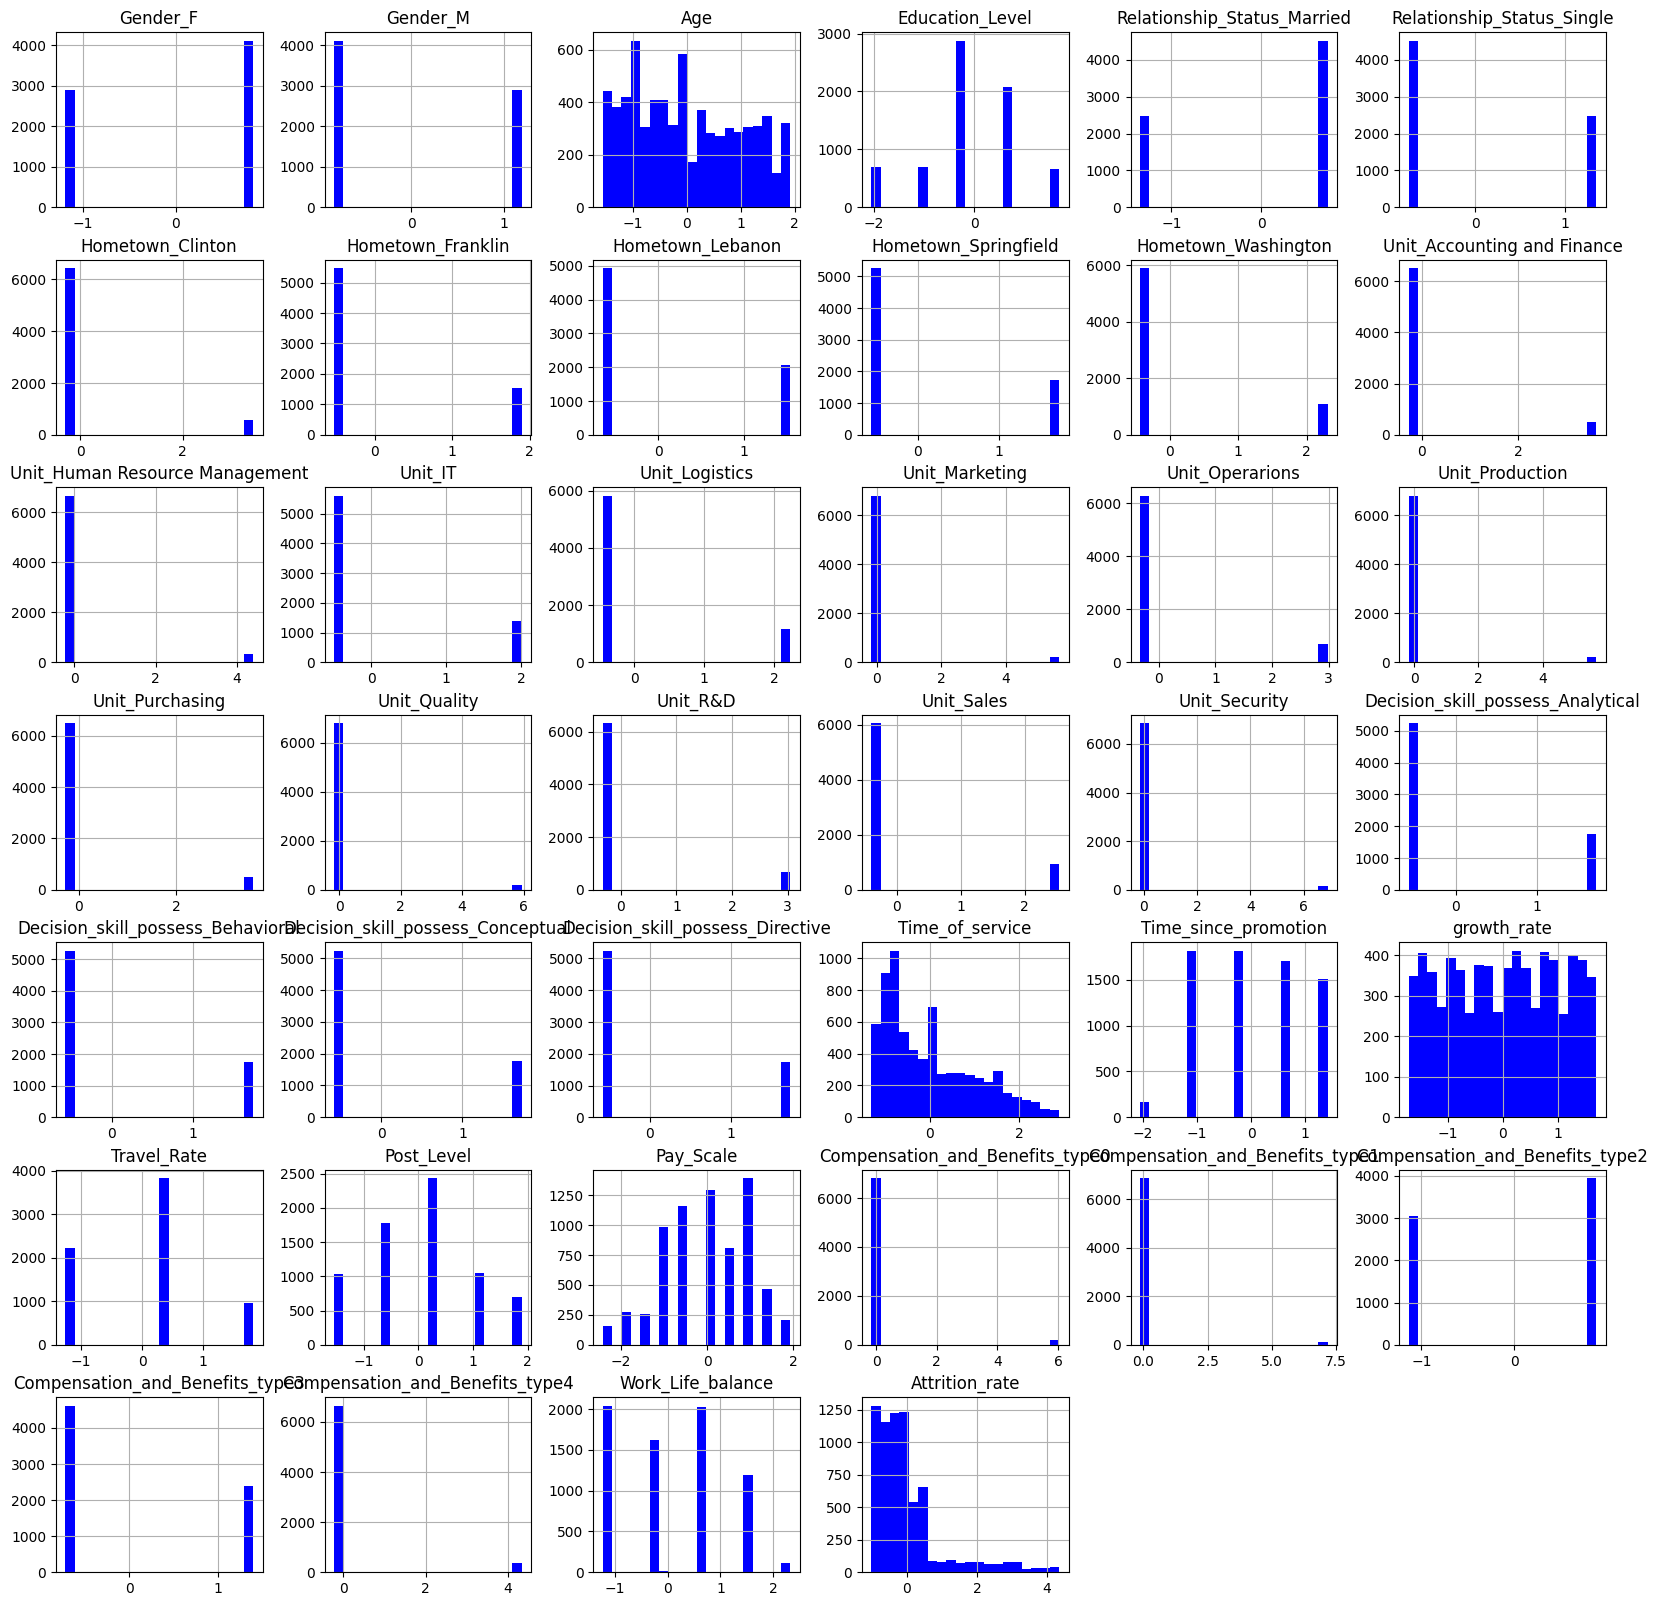

In [17]:
#Normalizo el dataframe
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

start_col, end_col = 'Gender_F','Attrition_rate'
selected_columns = TrainTmp.loc[:, start_col:end_col]
X = selected_columns

X2 = standarizingMethod(X)

col = selected_columns

# Get the column indices instead of names
start_index = selected_columns.columns.get_loc(start_col)
end_index = selected_columns.columns.get_loc(end_col) +1 # +1 to include end_col

df_X2 = pd.DataFrame(X2[:, start_index : end_index], columns = col.columns)
df_X2.hist(bins = 20, figsize = (20,20), color = 'b')

Pregunta 4. Selecciona el número de grupos adecuados para agrupar usando K-means:

  a)Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.

  b)Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

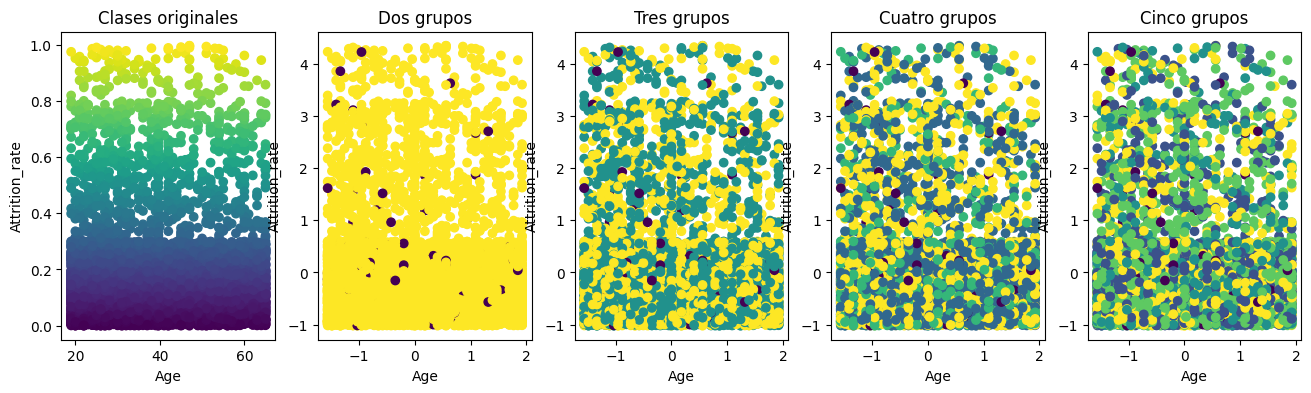

In [18]:
# Pregunta 4. Selecciona el número de grupos adecuados para agrupar usando K-means:
#  a) Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
#  b) Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

# Importando librerias
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Cargando datos

X = np.array(TrainTmp)

# Aquí necesitamos saber como se distribute la variable Attrition_rate
y = np.array(TrainTmp['Attrition_rate'])

xlabel = 'Age' #Selecciono una variable cualquiera para analizarla con Attrition_rate
ylabel = 'Attrition_rate'

colx_index = TrainTmp.columns.get_loc(xlabel)
coly_index = TrainTmp.columns.get_loc(ylabel)

n_cluster1 = 2
n_cluster2 = 3
n_cluster3 = 4
n_cluster4 = 5

X2 = standarizingMethod(TrainTmp)

y2 = KMeans(n_clusters=n_cluster1, random_state=42).fit_predict(X2)
y3 = KMeans(n_clusters=n_cluster2, random_state=42).fit_predict(X2)
y4 = KMeans(n_clusters=n_cluster3, random_state=42).fit_predict(X2)
y5 = KMeans(n_clusters=n_cluster4, random_state=42).fit_predict(X2)

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, figsize=(16,4))
ax0.scatter(X[:, colx_index], X[:, coly_index], c=y)
ax0.set_title('Clases originales')
ax0.set_xlabel(xlabel)
ax0.set_ylabel(ylabel)
ax1.scatter(X2[:, colx_index], X2[:, coly_index], c=y2)
ax1.set_title('Dos grupos')
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax2.scatter(X2[:, colx_index], X2[:, coly_index], c=y3)
ax2.set_title('Tres grupos')
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
ax3.scatter(X2[:, colx_index], X2[:, coly_index], c=y4)
ax3.set_title('Cuatro grupos')
ax3.set_xlabel(xlabel)
ax3.set_ylabel(ylabel)
ax4.scatter(X2[:, colx_index], X2[:, coly_index], c=y5)
ax4.set_title('Cinco grupos')
ax4.set_xlabel(xlabel)
ax4.set_ylabel(ylabel)
plt.show()

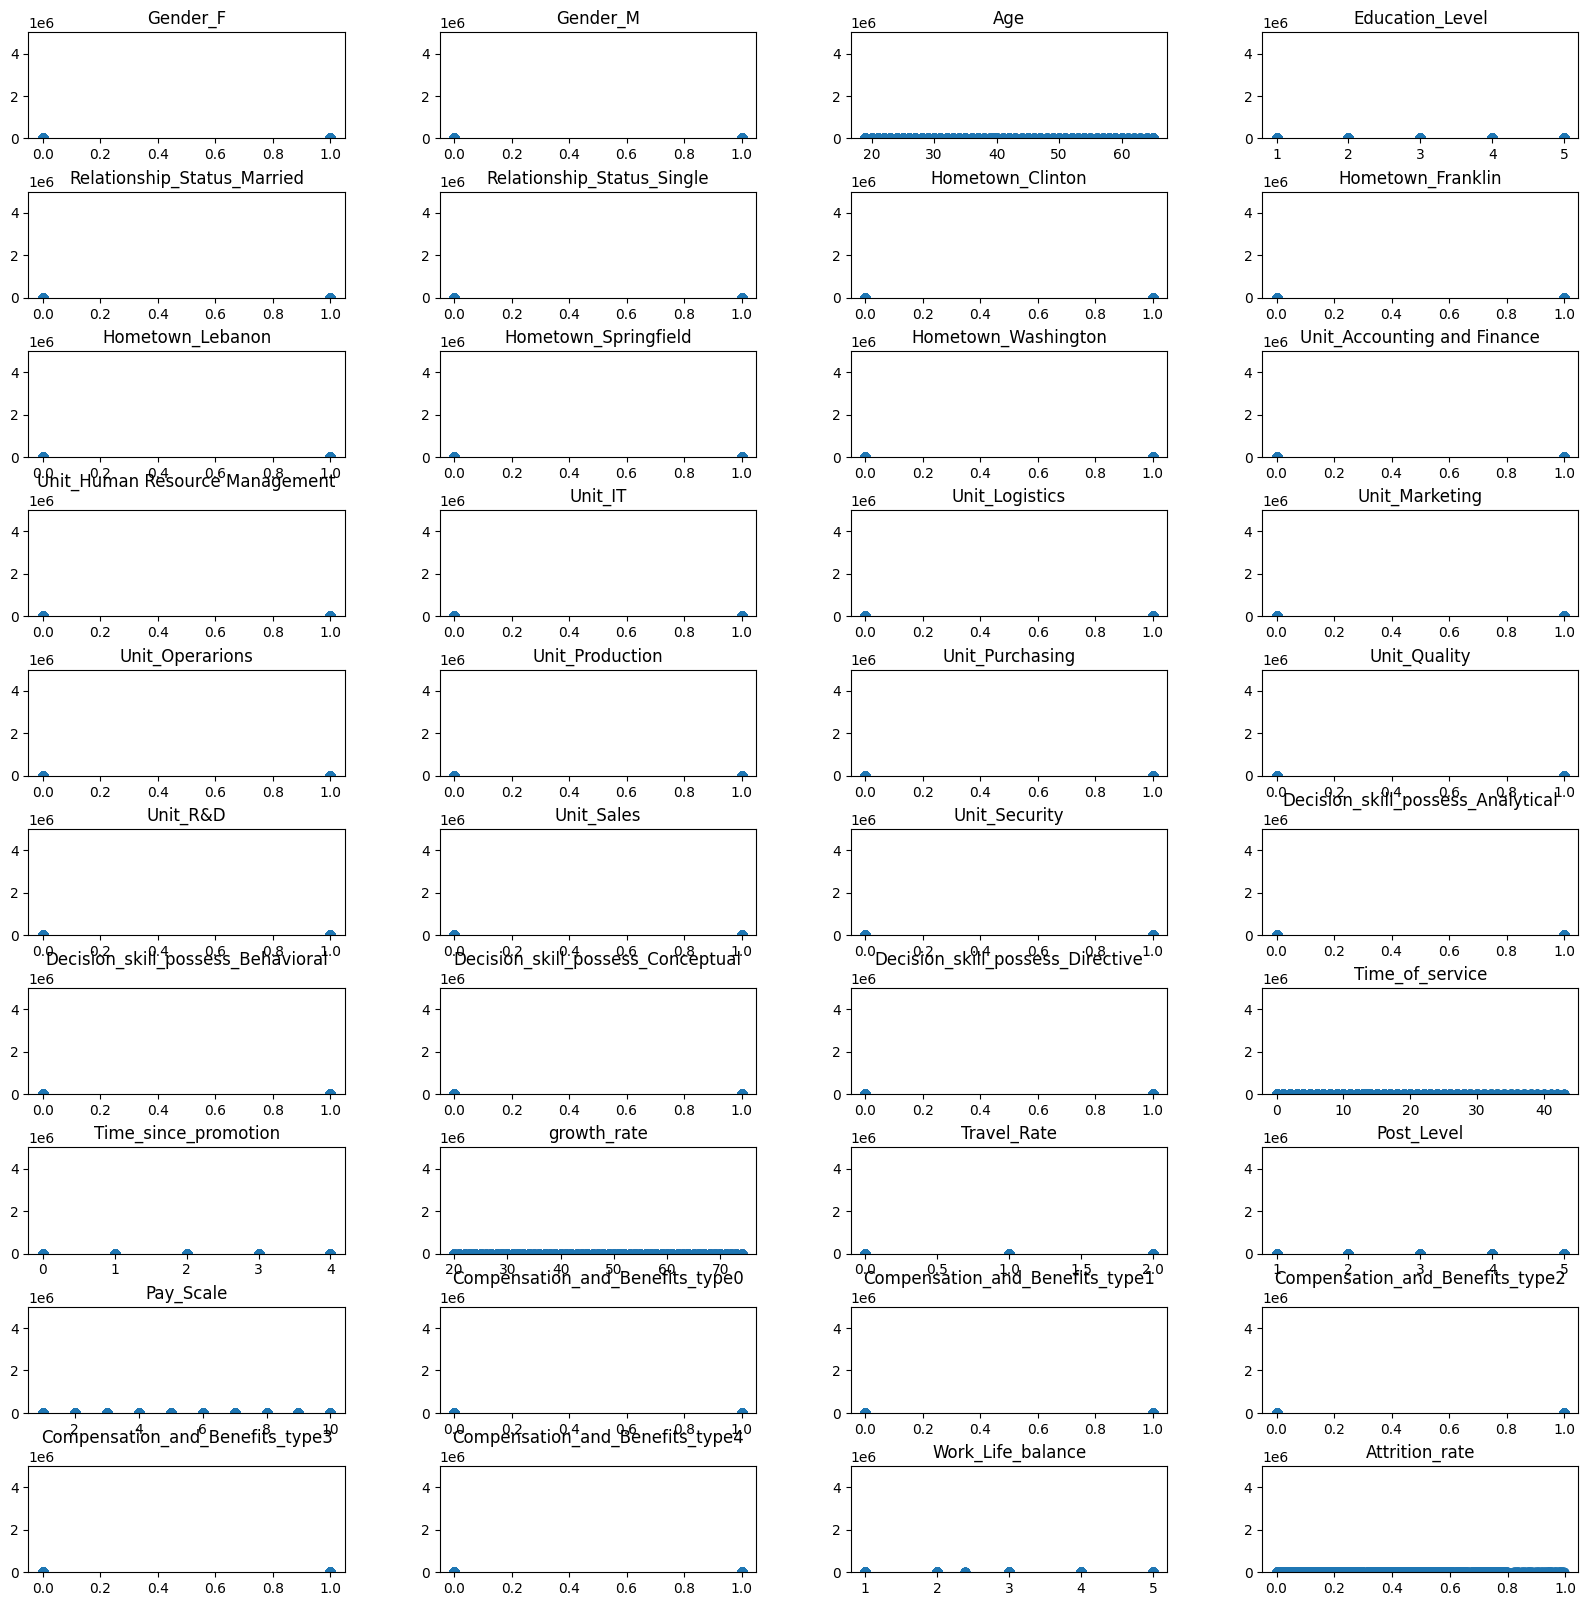

In [19]:
#Histogramas de cada variable contra Attrition_rate

from sklearn import datasets
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

X = np.array(TrainTmp)

col_target = 'Attrition_rate'
col_target_loc = TrainTmp.columns.get_loc(col_target)
v = 0
fig, axs = plt.subplots(10, 4, figsize=(20, 20))
for i in range(10):
  for j in range(4):
    axs[i, j].scatter(X[:, v], X[:, col_target_loc])
    axs[i, j].set_title(TrainTmp.columns[v])
    axs[i, j].set_ylim(0, 0.5e7)
    v += 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

In [20]:
#Indice Silhouette
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

#Codigo para el agrupamiento de datos. Agrupando en 2-10 grupos

X = standarizingMethod(TrainTmp)

results = {}
for k in range(2, 11):
    k_means = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = k_means.predict(X)
    #Codigo para la implementacion del indice
    idx_k = metrics.silhouette_score(X, y_pred, random_state=42)
    results[k] = idx_k
    print(idx_k)

0.19378133234284417
0.03669229356425039
0.043320253734329385
0.03601681613484886
0.045762817825458615
0.05195917489277675
0.06031635335500305
0.057598869546125565
0.06395629193982615


In [21]:
#Indice Calinski-Harabasz
from sklearn.metrics import calinski_harabasz_score

X = standarizingMethod(TrainTmp)

results = {}
for k in range(2, 11):
    k_means = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = k_means.predict(X)
    #Codigo para la implementacion del indice
    idx_k = metrics.calinski_harabasz_score(X, y_pred)
    results[k] = idx_k
    print(idx_k)

184.27431255362626
198.2609491555288
215.2922843095302
180.57221207764297
202.33398532154314
206.5301264741436
208.3359406237208
190.16082667350008
189.45575013609647


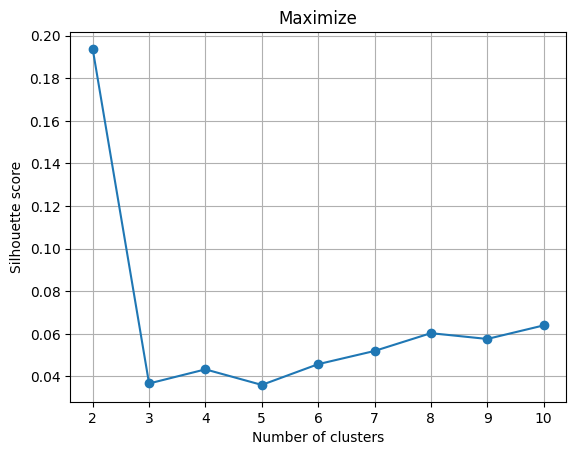

In [22]:
#Gráfica K-Elbow para índice Silhouette en BD de Attrition
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics

X = standarizingMethod(TrainTmp)

y_preds = []
results = {}
for k in range(2, 11):
    k_means = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k] = metrics.silhouette_score(X, y_pred, random_state=42)
cluster_counts = list(results.keys())
index_values  = list(results.values())
plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('Maximize')
plt.xlabel('Number of clusters')
plt.xticks(cluster_counts)
plt.ylabel('Silhouette score')
plt.show()

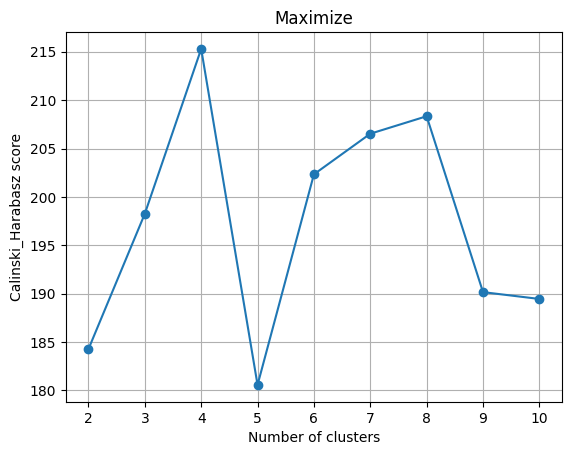

In [23]:
#Gráfica K-Elbow para índice Calinski-Harabasz en BD de Attrition
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics

X = standarizingMethod(TrainTmp)

y_preds = []
results = {}
for k in range(2, 11):
    k_means = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k] = metrics.calinski_harabasz_score(X, y_pred)
cluster_counts = list(results.keys())
index_values  = list(results.values())
plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('Maximize')
plt.xlabel('Number of clusters')
plt.xticks(cluster_counts)
plt.ylabel('Calinski_Harabasz score')
plt.show()

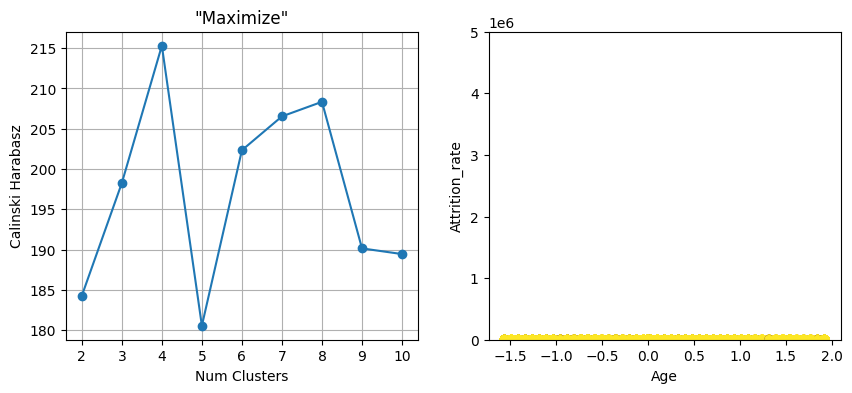

In [24]:
#Índice Calinski-Harabasz
#CODIGO ENTREGADO POR TLG

X = standarizingMethod(TrainTmp)

f = 4
t = 'Age'
nc = 11
xlabel = 'Age' #Selecciono una variable cualquiera para analizarla con Attrition_rate
ylabel = 'Attrition_rate'
colx_index = TrainTmp.columns.get_loc(xlabel)
coly_index = TrainTmp.columns.get_loc(ylabel)

y_preds = []
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X[:, colx_index], X[:, coly_index], c=y_preds[0])
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
plt.show()

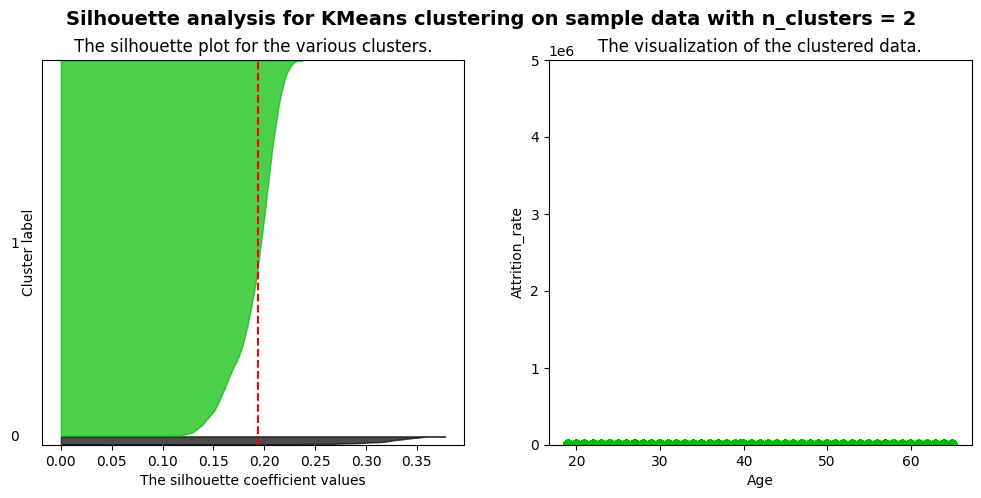

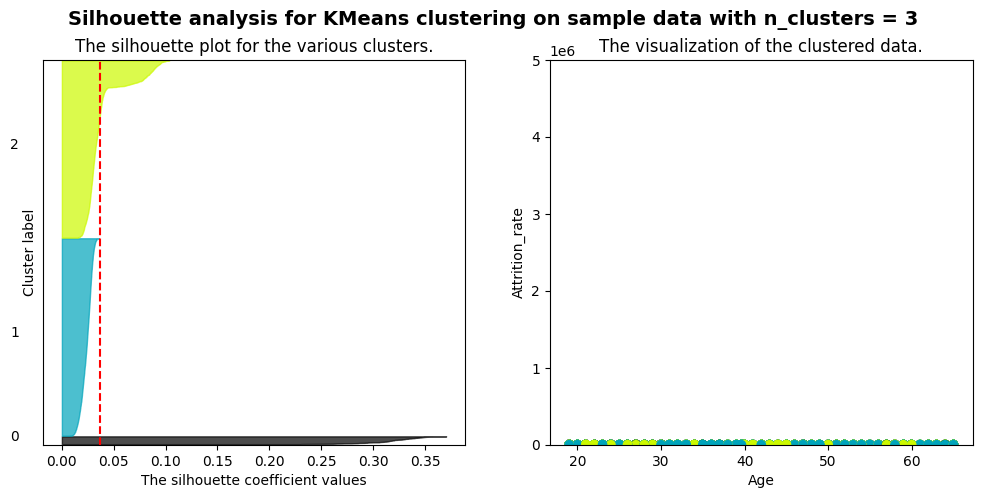

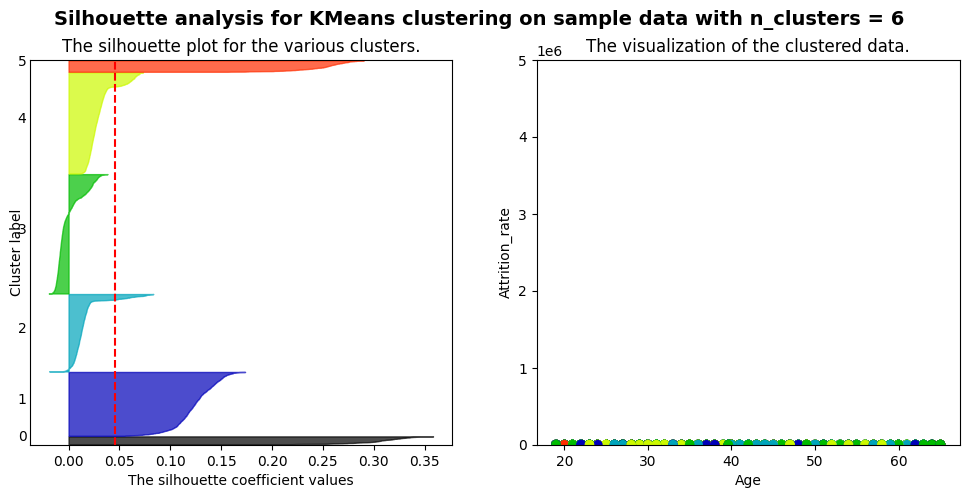

In [25]:
#Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)

import matplotlib.cm as cm

X = standarizingMethod(TrainTmp)
XNN = np.array(TrainTmp)

f = 4

t = 'Age'
nc = 11
xlabel = 'Age' #Selecciono una variable cualquiera para analizarla con Attrition_rate
ylabel = 'Attrition_rate'
colx_index = TrainTmp.columns.get_loc(xlabel)
coly_index = TrainTmp.columns.get_loc(ylabel)

for k in [2, 3, 6]:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])
  k_means = cluster.KMeans(n_clusters=k, random_state=42)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred, random_state=42)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([]) # Clear the yaxis labels / ticks
  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(XNN[:, colx_index], XNN[:, coly_index], c=colors)
  ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel(ylabel)
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " "with n_clusters = %d" % k), fontsize=14, fontweight='bold')
plt.show()

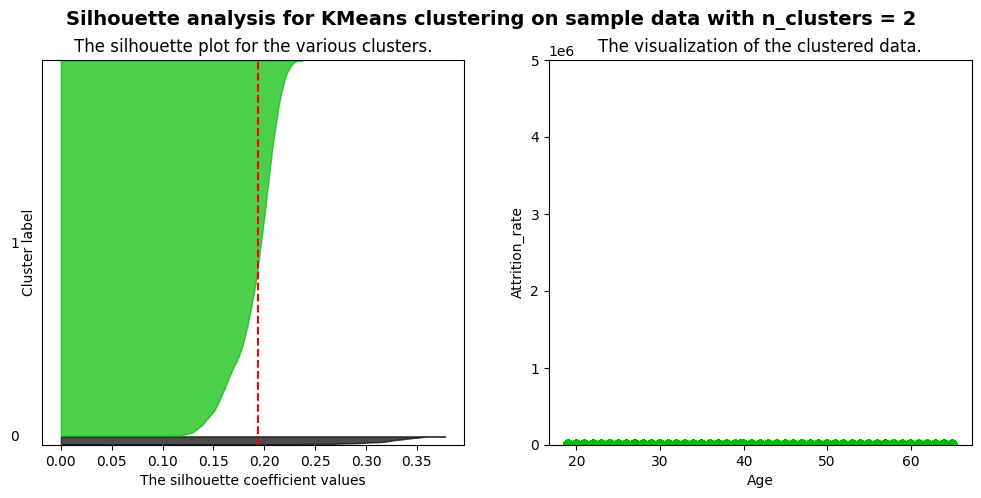

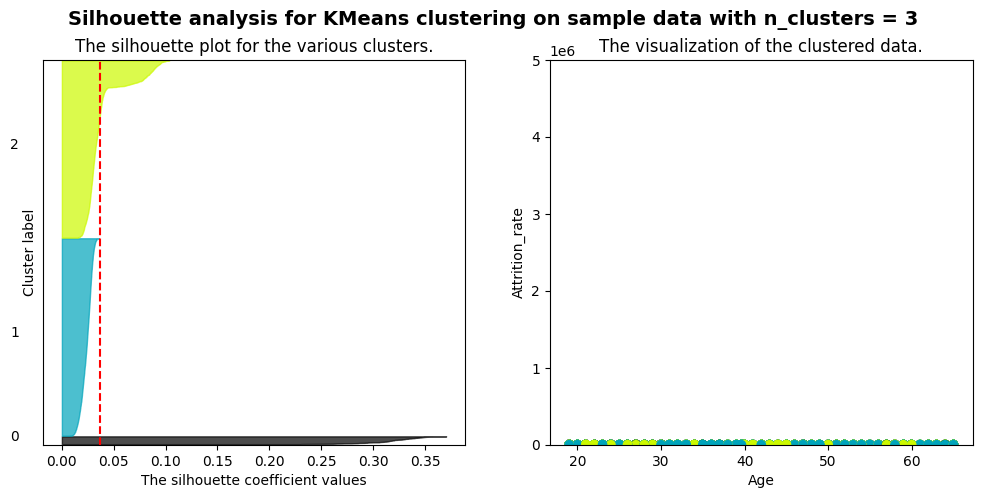

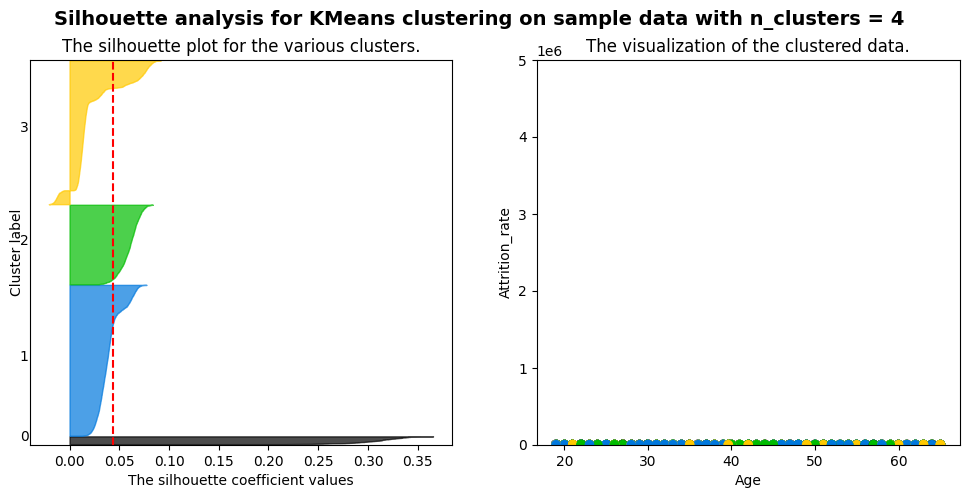

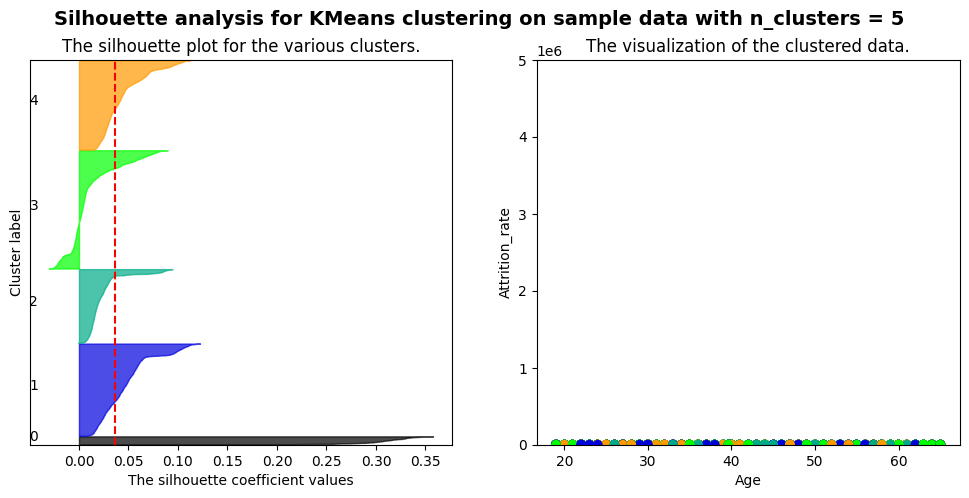

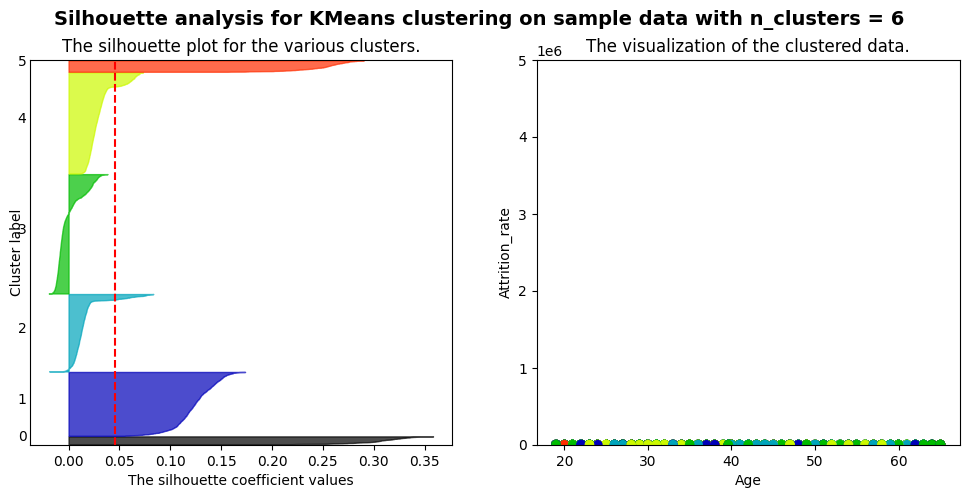

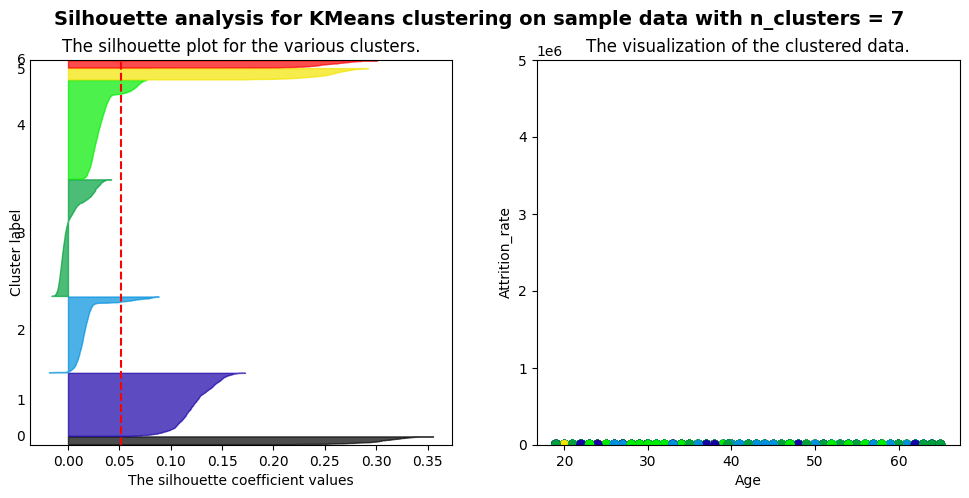

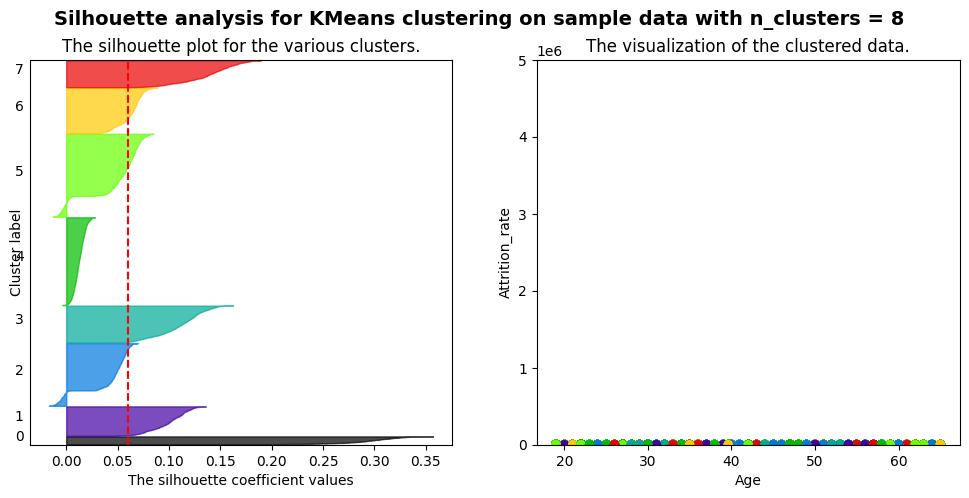

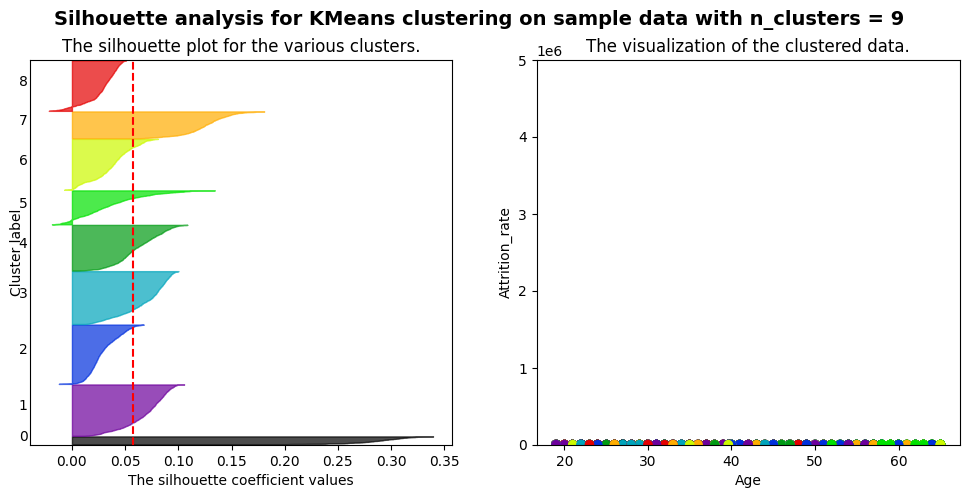

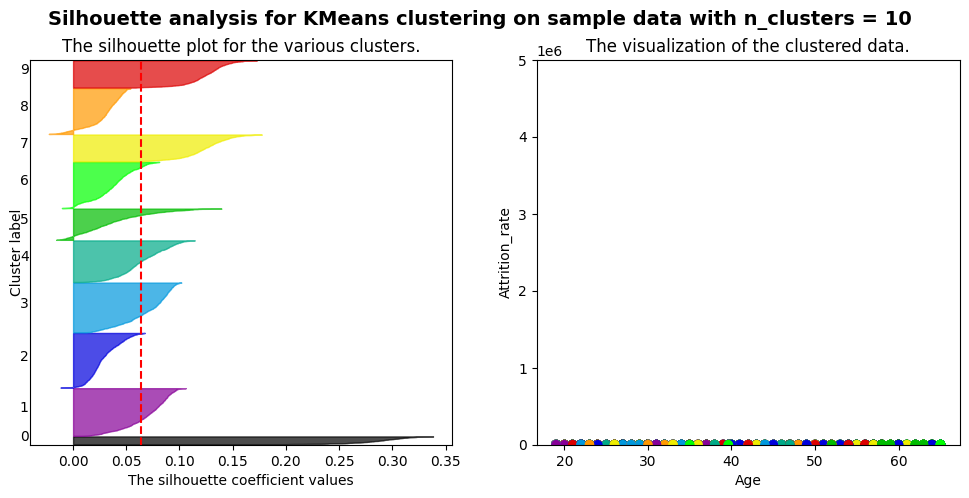

In [26]:
#Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)
import matplotlib.cm as cm

X = standarizingMethod(TrainTmp)
XNN = np.array(TrainTmp)

xlabel = 'Age' #Selecciono una variable cualquiera para analizarla con Attrition_rate
ylabel = 'Attrition_rate'
colx_index = TrainTmp.columns.get_loc(xlabel)
coly_index = TrainTmp.columns.get_loc(ylabel)

for k in range(2, nc):
 fig, (ax0, ax1) = plt.subplots(1, 2)
 fig.set_size_inches(12, 5)

 # The (k+1)*10 is for inserting blank space between silhouette
 # plots of individual clusters, to demarcate them clearly.
 ax0.set_ylim([0, len(X) + (k + 1) * 10])

 k_means = cluster.KMeans(n_clusters=k, random_state=42)
 y_pred = k_means.fit_predict(X)
 silhouette_avg = metrics.silhouette_score(X, y_pred, random_state=42)
 sample_silhouette_values = metrics.silhouette_samples(X, y_pred)

 y_lower = 10
 for i in range(k):
 # Aggregate the silhouette scores for samples belonging to
 # cluster i, and sort them
   ith_cluster_silhouette_values = \
      sample_silhouette_values[y_pred == i]

   ith_cluster_silhouette_values.sort()

   size_cluster_i = ith_cluster_silhouette_values.shape[0]
   y_upper = y_lower + size_cluster_i

   color = cm.nipy_spectral(float(i) / k)
   ax0.fill_betweenx(np.arange(y_lower, y_upper),
      0, ith_cluster_silhouette_values,
      facecolor=color, edgecolor=color, alpha=0.7)

   # Label the silhouette plots with their cluster numbers at the middle
   ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

   # Compute the new y_lower for next plot
   y_lower = y_upper + 10 # 10 for the 0 samples

 ax0.set_title("The silhouette plot for the various clusters.")
 ax0.set_xlabel("The silhouette coefficient values")
 ax0.set_ylabel("Cluster label")
 ax0.set_yticks([]) # Clear the yaxis labels / ticks

 # The vertical line for average silhouette score of all the values
 ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

 # 2nd Plot showing the actual clusters formed
 colors = cm.nipy_spectral(y_pred.astype(float) / k)
 ax1.scatter(XNN[:, colx_index], XNN[:, coly_index], c=colors)
 ax1.set_ylim(0, 0.5e7)
 ax1.set_title("The visualization of the clustered data.")
 ax1.set_xlabel(xlabel)
 ax1.set_ylabel(ylabel)

 plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
   "with n_clusters = %d" % k),
    fontsize=14, fontweight='bold')

plt.show()

In [27]:
#Inicializa variable Global de number_of_clusters, basado en K-Elbow y/o Silhouette/Calinski-Harabasz indexes
number_of_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


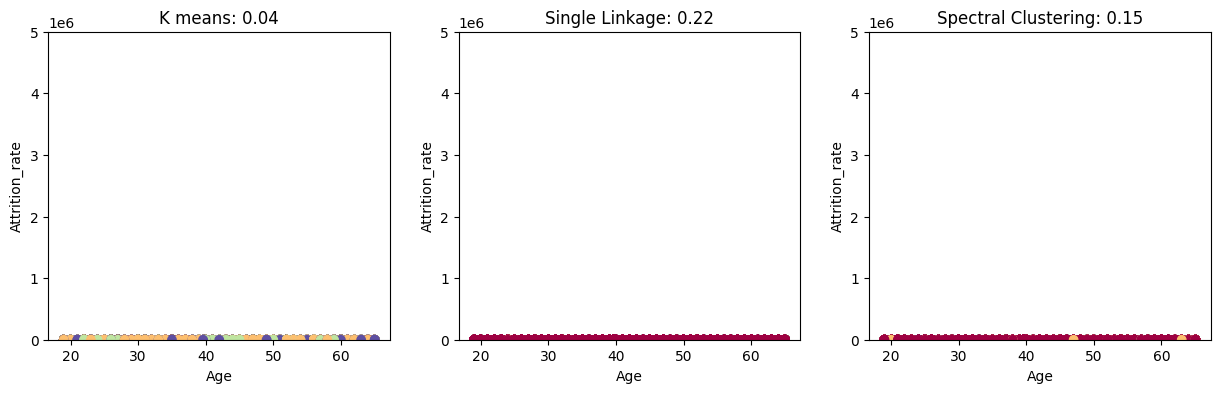

In [28]:
#Comparación relativa de distintos Algoritmos de Agrupamiento

X = standarizingMethod(TrainTmp)

xlabel = 'Age' #Selecciono una variable cualquiera para analizarla con Attrition_rate
ylabel = 'Attrition_rate'
colx_index = TrainTmp.columns.get_loc(xlabel)
coly_index = TrainTmp.columns.get_loc(ylabel)

k = number_of_clusters # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k, random_state=42)
y_pred1 = k_means.fit_predict(X)
s1 = metrics.silhouette_score(X, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X)
s2 = metrics.silhouette_score(X, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors", random_state=42)
y_pred3 = spectral.fit_predict(X)
s3 = metrics.silhouette_score(X, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.scatter(XNN[:, colx_index], XNN[:, coly_index], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0, 0.5e7)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel(xlabel)
ax0.set_ylabel(ylabel)

ax1.scatter(XNN[:, colx_index], XNN[:, coly_index], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax2.scatter(XNN[:, colx_index], XNN[:, coly_index], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0, 0.5e7)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)

plt.show()

Pregunta 5. Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:

a) Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [29]:
# Pregunta 5. Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
# a) Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

#Segmentación de los Datos
Train['groups'] = y_pred1
Trains = [Train[Train['groups']==g] for g in range(k)]

for g in range(k):
  print('Group'+str(g),'has',len(Trains[g]),'items.')

#Descripción de los grupos
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = Train.columns[:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
  row = []
  for col in grouped['Features']:
        if Trains[g][col].dtype != 'object':
           row.append(np.round(Trains[g][col].mean(),2))
        else:
           row.append(Trains[g][col].value_counts().keys()[0])
  grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped

Group0 has 144 items.
Group1 has 2764 items.
Group2 has 1457 items.
Group3 has 2635 items.


Features      Group0      Group1      Group2      Group3
0                 Employee_ID   EID_14177   EID_23371   EID_19087   EID_18000
1                      Gender           F           F           F           M
2                         Age       38.33       40.04        39.0        39.6
3             Education_Level        3.25        3.19        3.21        3.17
4         Relationship_Status     Married     Married     Married      Single
5                    Hometown     Lebanon     Lebanon     Lebanon     Lebanon
6                        Unit    Security          IT          IT          IT
7      Decision_skill_possess  Analytical  Behavioral  Analytical  Conceptual
8             Time_of_service       12.05       13.61       13.03       13.41
9        Time_since_promotion         2.4         2.4        2.36        2.33
10                growth_rate       48.33        47.1       47.07       46.95
11                Travel_Rate        0.79        0.82        0.81        0.81
12                 Post_Level        2.83        2.79        2.79        2.81
13                  Pay_Scale        5.97        6.02        5.97        6.02
14  Compensation_and_Benefits       type2       type2       type2       type2
15          Work_Life_balance        2.53        2.36        2.41        2.39
16                       VAR1        3.05        3.11        3.07         3.1
17                       VAR2       -0.03       -0.01        0.01       -0.02
18                       VAR3        0.01       -0.04         0.0        0.01
19                       VAR4        1.93        1.88         1.9        1.89
20                       VAR5        2.77        2.86        2.79        2.84
21                       VAR6        7.13        7.11        7.09         7.1
22                       VAR7        3.11        3.25        3.25        3.28
23             Attrition_rate        0.19        0.18        0.19         0.2

Pregunta 6. Interpreta los resultados obtenidos:

a) Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.

b) Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.

In [30]:
#Gráfica de barras para el promedio de las variables en los grupos
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[0:24]]
dfg

# Select only numerical columns before scaling
dfg_numerical = dfg.apply(pd.to_numeric, errors='coerce')
dfg_numerical = dfg_numerical.dropna(axis = 1)

#Xt = StandardScaler().fit_transform(dfg_numerical.to_numpy())
Xt = dfg_numerical.to_numpy() #No normlizado
Xt = Xt + abs(np.min(Xt))

import plotly.graph_objects as go
fig = go.Figure()
for j in range(len(dfg)):
  fig.add_trace(go.Bar( y=Xt[j,:], x=dfg_numerical.columns, name='Group '+str(j)))
  fig.update_layout(title='Variable mean per group', yaxis_title='No normalized values', margin=dict(l=50, r=50, t=50, b=50))
fig.show()

In [31]:
#Gráfico de cajas y botones
Trains = Train.sort_values('groups')
groups = Trains['groups']
#Trains = Trains[Trains.columns[0:24]]

# Select only numerical columns before scaling
Train_numerical = Train.select_dtypes(include=['number'])
Train_numerical = Train_numerical.drop('groups', axis=1)

#Xt = StandardScaler().fit_transform(house1.to_numpy())
Xt = Train_numerical.to_numpy() #No normlizado
x = ['Group '+str(g) for g in groups]

fig = go.Figure()
for j in range(len(Train_numerical.columns)):
   fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=Train_numerical.columns[j]
 ))
fig.update_layout(
    title='Variable boxplot grouped',
    yaxis_title='No normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

Conclusiones preliminares hasta este punto

Tanto el gráfico de barras como el gráfico de cajas y botones muestran 3 variables que posiblemente tengan un mayor grado de varianza que el resto; **Age**, **Time_of_service**, **growth_rate**. El resto tienen menos varianza excepto **Attrition_rate** que el target. Se oberva que los números son muy parecidos en todos los grupos y se procederá al análisis en aquellos grupos que podrían tener cierta inferencia en el target

Se estableció de acuerdo a la métrica K-Elbow que 4 grupos es un buen número de grupos y de allí se partió para el análisis. Prácticamente el **Attrition_rate** es similar para los grupos excepto uno de los grupos que tiene el **Attrition_rate** mas alto y de acuerdo al análisis corresponde a los empleados a los dos grupos de empleados con mayor edad junto con el tiempo de servicio, aún así parece que el ritmo de crecimiento (**growth_rate**) es muy similar y no parece ser un factor determinante.

Por último, el nivel de educación (**Education_Level**) y el tiempo desde la última promoción (**Time_since_promotion**) parecen ser los menores de todos los grupos respecto al grupo con mayor **Attrition_rate** y habría que revisar este punto para evitar su deserción.

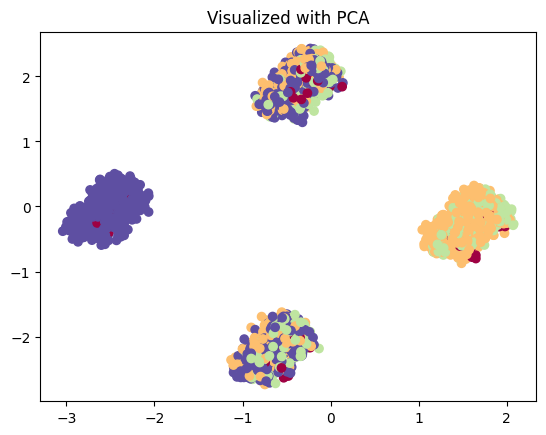

[[ 1.7253261   0.16485487]
 [-2.33387459  0.14501527]
 [ 1.8744245   0.07743057]
 ...
 [-0.55089294 -1.71080225]
 [ 1.67362022 -0.08822489]
 [ 1.67683922  0.1403008 ]]


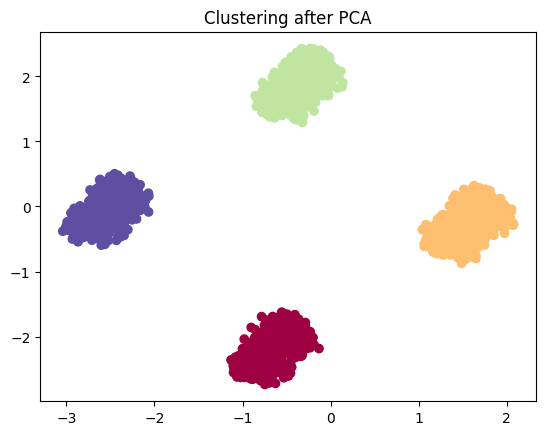

Features      Group0      Group1      Group2     Group3
0                 Employee_ID   EID_17492   EID_23371    EID_2278  EID_18000
1                      Gender           F           F           M          M
2                         Age       39.57       39.62       39.68       39.6
3             Education_Level        3.19         3.2        3.18       3.19
4         Relationship_Status      Single     Married     Married     Single
5                    Hometown     Lebanon     Lebanon     Lebanon    Lebanon
6                        Unit          IT          IT          IT         IT
7      Decision_skill_possess  Conceptual  Analytical  Behavioral  Directive
8             Time_of_service       13.35       13.41       13.32      13.48
9        Time_since_promotion        2.39        2.39        2.35       2.32
10                growth_rate       47.66       46.98       46.94      46.67
11                Travel_Rate        0.84         0.8        0.84        0.8
12                 Post_Level        2.81        2.79        2.78       2.84
13                  Pay_Scale        6.03        6.01        5.97       6.03
14  Compensation_and_Benefits       type2       type2       type2      type2
15          Work_Life_balance        2.38         2.4        2.38       2.39
16                       VAR1        3.11         3.1        3.09       3.11
17                       VAR2       -0.07        0.02       -0.02       0.02
18                       VAR3         0.0       -0.02       -0.02       -0.0
19                       VAR4        1.91        1.88        1.88        1.9
20                       VAR5        2.82        2.82        2.87       2.82
21                       VAR6        7.08         7.1        7.11       7.12
22                       VAR7        3.28        3.24        3.25       3.28
23             Attrition_rate        0.19        0.18         0.2        0.2

In [32]:
#PCA
from sklearn.decomposition import PCA

X2 = PCA(n_components=2).fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with PCA')
plt.show()

print(X2)

y_pca = cluster.KMeans(n_clusters=number_of_clusters, random_state=42).fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pca, cmap=plt.cm.Spectral)
plt.title('Clustering after PCA')
plt.show()

Train_pca = Train.copy(deep=True)
Train_pca['groups'] = y_pca
Train_pca_list = [Train_pca[Train_pca['groups']==g] for g in range(k)]

grouped_pca = pd.DataFrame()
grouped_pca['Features'] = Train_pca_list[0].columns[:-1]
for g in range(k):
    row = []
    for col in grouped_pca['Features']:
        if Train_pca_list[g][col].dtype != 'object':
            row.append(np.round(Train_pca_list[g][col].mean(),2))
        else:
            row.append(Train_pca_list[g][col].value_counts().keys()[0])
    grouped_pca['Group'+str(g)] = row
grouped_pca



In [34]:
#Gráfica de barras para el promedio de las variables en los grupos
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[0:24]]
dfg

# Select only numerical columns before scaling
dfg_numerical = dfg.apply(pd.to_numeric, errors='coerce')
dfg_numerical = dfg_numerical.dropna(axis = 1)

#Xt = StandardScaler().fit_transform(dfg_numerical.to_numpy())
Xt = dfg_numerical.to_numpy() #No normlizado
Xt = Xt + abs(np.min(Xt))

import plotly.graph_objects as go
fig = go.Figure()
for j in range(len(dfg)):
  fig.add_trace(go.Bar( y=Xt[j,:], x=dfg_numerical.columns, name='Group '+str(j)))
  fig.update_layout(title='Variable mean per group', yaxis_title='No normalized values', margin=dict(l=50, r=50, t=50, b=50))
fig.show()

In [33]:
#Gráfico de cajas y botones
Trains = Train.sort_values('groups')
groups = Trains['groups']
#Trains = Trains[Trains.columns[0:24]]

# Select only numerical columns before scaling
Train_numerical = Train.select_dtypes(include=['number'])
Train_numerical = Train_numerical.drop('groups', axis=1)

#Xt = StandardScaler().fit_transform(house1.to_numpy())
Xt = Train_numerical.to_numpy() #No normlizado
x = ['Group '+str(g) for g in groups]

fig = go.Figure()
for j in range(len(Train_numerical.columns)):
   fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=Train_numerical.columns[j]
 ))
fig.update_layout(
    title='Variable boxplot grouped',
    yaxis_title='No normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 1.991070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.424388
[t-SNE] KL divergence after 1000 iterations: 1.349941


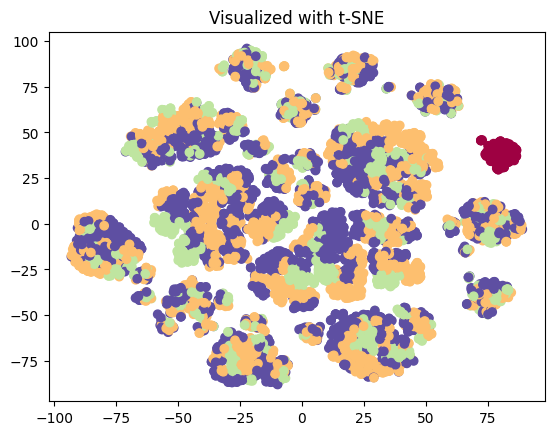

In [36]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0, method='exact', verbose=1).fit_transform(X)

plt.scatter(tsne[:, 0], tsne[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with t-SNE')
plt.show()